<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

# <font color='red' style='font-size: 30px;'>1.2 Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [2]:
df_imoveis = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [3]:
df_imoveis.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [4]:
df_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Praia     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


## Verificando o tamanho do dataset

In [5]:
df_imoveis.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>1.3 Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [6]:
df_imoveis.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [7]:
df_imoveis.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


# <font color='red' style='font-size: 30px;'>2.1 Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Importando biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O Seaborn é uma biblioteca Python de visualização de dados baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos.</p>

In [8]:
import seaborn as sns

## Configurações de estilo e cor da biblioteca *seaborn*

### Controle de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

* Lista completa de todos os valores de style que você pode escolher:</br>
darkgrid, whitegrid, dark, white, and ticks
|style|
|---|
|darkgrid|
|whitegrid|
|dark|
|white|
|ticks|

### Paleta de cores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

* Lista completa de todos os valores da paleta que você pode escolher:</br>
|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|Paleta|
|---|---|---|---|---|---|---|---|---|---|
|Accent|Accent_r|Blues|Blues_r|BrBG|BrBG_r|BuGn|BuGn_r|BuPu|BuPu_r|
|CMRmap|CMRmap_r|Dark2|Dark2_r|GnBu|GnBu_r|Greens|Greens_r|Greys|Greys_r|
|OrRd|OrRd_r|Oranges|Oranges_r|PRGn|PRGn_r|Paired|Paired_r|Pastel1|Pastel1_r|
|Pastel2|Pastel2_r|PiYG|PiYG_r|PuBu|PuBuGn|PuBuGn_r|PuBu_r|PuOr|PuOr_r|
|PuRd|PuRd_r|Purples|Purples_r|RdBu|RdBu_r|RdGy|RdGy_r|RdPu|RdPu_r|
|RdYlBu|RdYlBu_r|RdYlGn|RdYlGn_r|Reds|Reds_r|Set1|Set1_r|Set2|Set2_r|
|Set3|Set3_r|Spectral|Spectral_r|Wistia|Wistia_r|YlGn|YlGnBu|YlGnBu_r|YlGn_r|
|YlOrBr|YlOrBr_r|YlOrRd|YlOrRd_r|afmhot|afmhot_r|autumn|autumn_r|binary|binary_r|
|bone|bone_r|brg|brg_r|bwr|bwr_r|cividis|cividis_r|cool|cool_r|
|coolwarm|coolwarm_r|copper|copper_r|cubehelix|cubehelix_r|flag|flag_r|gist_earth|gist_earth_r|
|gist_gray|gist_gray_r|gist_heat|gist_heat_r|gist_ncar|gist_ncar_r|gist_rainbow|gist_rainbow_r|gist_stern|gist_stern_r|
|gist_yarg|gist_yarg_r|gnuplot|gnuplot2|gnuplot2_r|gnuplot_r|gray|gray_r|hot|hot_r|
|hsv|hsv_r|icefire|icefire_r|inferno|inferno_r|magma|magma_r|mako|mako_r|
|nipy_spectral|nipy_spectral_r|ocean|ocean_r|pink|pink_r|plasma|plasma_r|prism|prism_r|
|rainbow|rainbow_r|rocket|rocket_r|seismic|seismic_r|spring|spring_r|summer|summer_r|
|tab10|tab10_r|tab20|tab20_r|tab20b|tab20b_r|tab20c|tab20c_r|terrain|terrain_r|
|twilight|twilight_r|twilight_shifted|twilight_shifted_r|viridis|viridis_r|vlag|vlag_r|winter|winter_r|

In [9]:
# style => darkgrid, whitegrid, dark, white, and ticks
sns.set_style('darkgrid')

# palette => configurando como coolwarm
sns.set_palette('Set2')

## Box plot da variável *dependente* (y)
As estatísticas descritivas necessárias para se construir um box-plot são:
* 1º quartil
* mediana
* 3º quartil

<img width='700px' src='../Dados/img/Box-Plot.png'>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

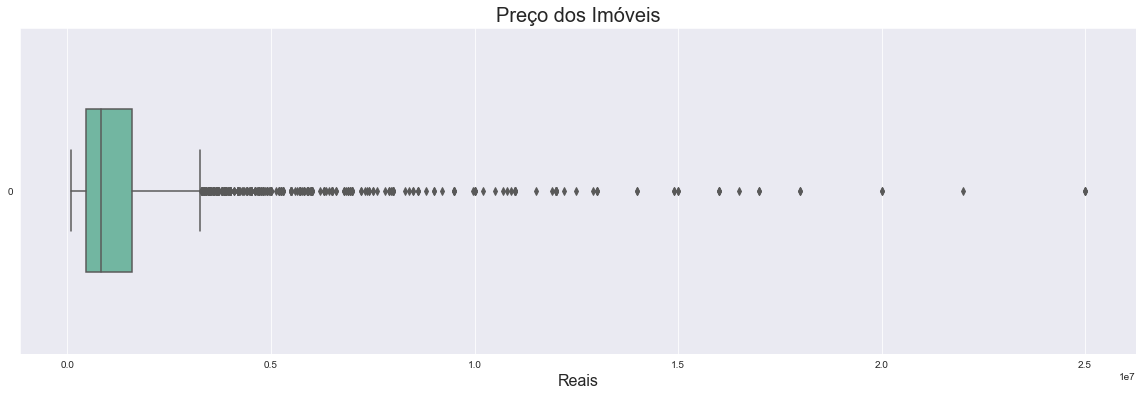

In [10]:
ax = sns.boxplot(data=df_imoveis['Valor'], orient='h', width=0.5)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>2.2 Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Count'>

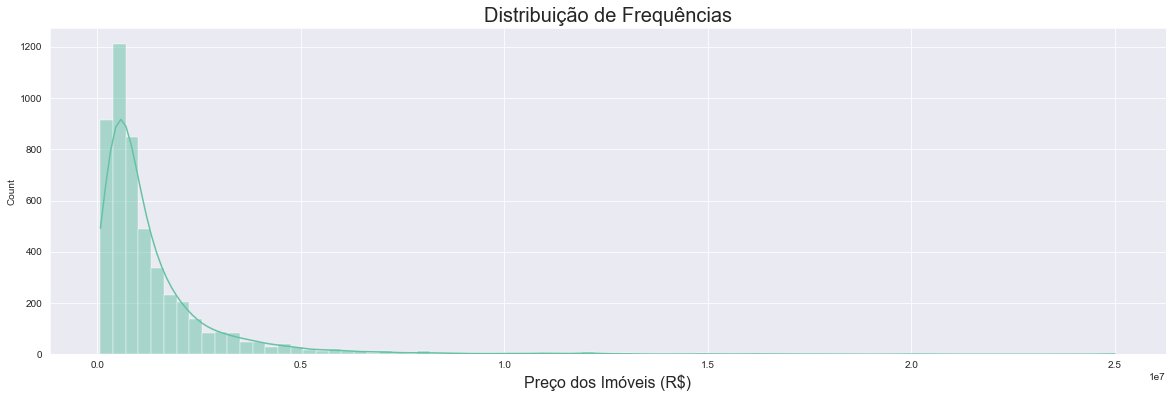

In [11]:
ax = sns.histplot(data=df_imoveis['Valor'], kde=True, bins=80)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<img width='800px' src='../Dados/img/Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>2.3 Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Plota o relacionamento entre pares de variáveis em um dataset.</p>

In [12]:
df_imoveis.columns

Index(['Valor', 'Area', 'Dist_Praia', 'Dist_Farmacia'], dtype='object')

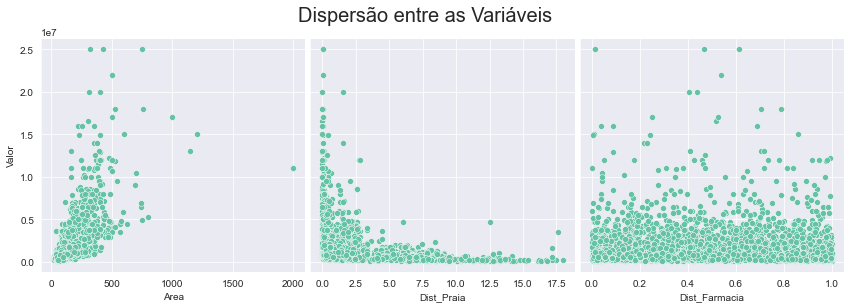

In [13]:
ax = sns.pairplot(df_imoveis, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=4)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

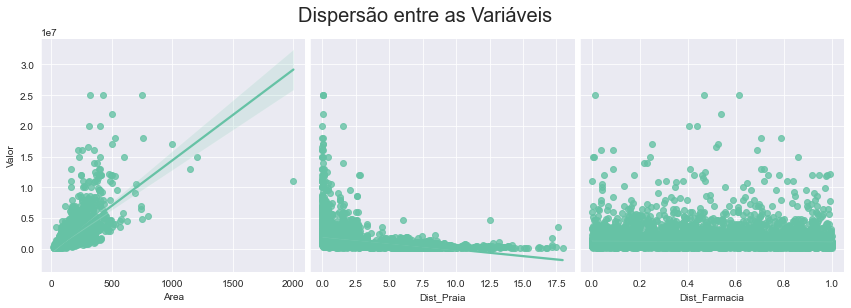

In [14]:
ax = sns.pairplot(df_imoveis, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>3.1 Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal
<hr>

### Por quê? 
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Testes paramétricos assumem que os dados amostrais foram coletados de uma população com distribuição de probabilidade conhecida. Boa parte dos testes estatísticos assumem que os dados seguem uma distribuição normal (t de Student, intervalos de confiança etc.).</p>



<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'></p>

## Importando biblioteca numpy

In [15]:
import numpy as np

## Aplicando a transformação logarítmica aos dados do *dataset*

Um dos principais motivos de se transformar alguns tipos de dados é para tentar corrigir a assimetria que tais informações apresentam quando observadas em nível.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.log.html

In [16]:
# A curva logarítimica nunca toca no ZERO, por isso Log(0) é -infinito
print(f'Log(0) - {np.log(0)}')
print(f'Log(1) - {np.log(1)}')

Log(0) - -inf
Log(1) - 0.0


C:\Users\renat\AppData\Local\Temp/ipykernel_12564/3594603296.py:2: RuntimeWarning: divide by zero encountered in log
  print(f'Log(0) - {np.log(0)}')


In [17]:
df_imoveis['log_Valor']      = np.log(df_imoveis['Valor'])
df_imoveis['log_Area']       = np.log(df_imoveis['Area'])

# Dist_Praia possui valor ZERO, para evitar -inf somamos +1, onde log(1) volta a ser 0
df_imoveis['log_Dist_Praia'] = np.log(df_imoveis['Dist_Praia'] + 1) 

# Dist_Farmacia possui valor ZERO, para evitar -inf somamos +1, onde log(1) volta a ser 0
df_imoveis['log_Dist_Farmacia'] = np.log(df_imoveis['Dist_Farmacia'] + 1) 

In [18]:
df_imoveis.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)
<font color='red'>Conseguimos eliminar aquele efeito de assimetria à direita. Inclusive, obtivemos um gráfico próximo à distribuição normal, que estamos tentando alcançar.</font>

<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis', ylabel='Count'>

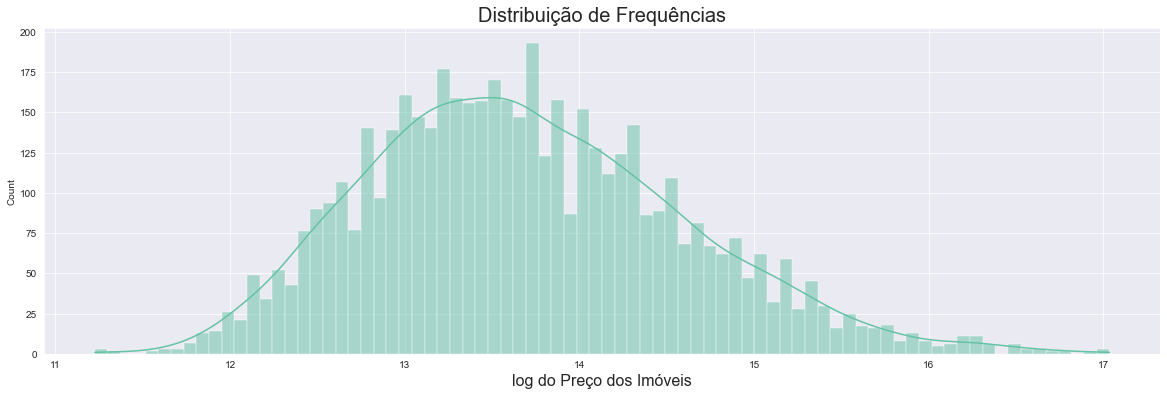

In [19]:
ax = sns.histplot(data=df_imoveis['log_Valor'], kde=True, bins=80)
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>3.2 Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

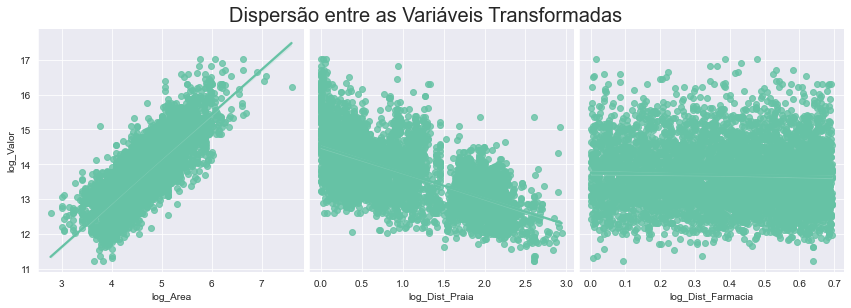

In [20]:
ax = sns.pairplot(df_imoveis, y_vars='log_Valor', x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=4, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>4.1 Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [21]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [22]:
y = df_imoveis['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [23]:
X = df_imoveis[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2811)

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>



<img width='800px' src='../Dados/img/Log-linear.png'>

## Importando a biblioteca statsmodels

https://www.statsmodels.org/stable/index.html

In [25]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [26]:
X_train_com_constante = sm.add_constant(X_train)

C:\Users\renat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
X_train.head()

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903


In [28]:
X_train_com_constante.head()

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903


In [29]:
# Estimando o modelo com statsmodels
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hascont=True).fit()

# <font color='red' style='font-size: 30px;'>4.2 Avaliando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Avaliando as estatísticas de teste do modelo

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:41   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

<font color='blue'>
O <b>teste F</b> é utilizado para testar simultaneamente a significância de um conjunto de parâmetros.</br>
O <b>teste t</b> é utilizado para testar a significância de cada parâmetro individualmente.
</font>

<font color='red'><b>Estatística de Resumo Utilizando o Método dos Mínimos Quadrados Ordinários OLS (do inglês Ordinary Least Squares)</b></font>
* <font color='red'> <b>No. Observations   - </b>Número de observações</font>
* <font color='red'> <b>R-squared          - </b>R2, alcançamos 80% </font>
* <font color='red'> <b>Adj. R-squared     - </b>R2 ajustado, considera os graus de liberdade, ou seja, se colocarmos muitas variáveis ele vai diminuindo seu grau de liberdade.</font>
* <font color='red'> <b>F-statistic        - </b>é o teste F, um importante testes de hipótese - que testa a significância de todos os parâmetros do modelo em conjunto</font>
* <font color='red'> <b>Prob (F-statistic) - </b>valores acima de 0.05, rejeitamos o modelo.

# <font color='red' style='font-size: 30px;'>4.3 Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [31]:
# log_Dist_Farmacia não é significativo - P>|t| = 0.603 > 0.5
X2 = df_imoveis[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [32]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [33]:
X2_train_com_constante = sm.add_constant(X2_train)
modelo_statsmodels = sm.OLS(y_train, X2_train_com_constante, hascont=True).fit()

C:\Users\renat\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Avaliando as estatísticas de teste do novo modelo

In [34]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:37:42   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='red' style='font-size: 30px;'>5.1 Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [46]:
modelo_reg = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [109]:
modelo_reg.fit(X2_train, y2_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [53]:
# Exatamente o mesmo encontrado no statsmodel - 80,5%
print(f'R² base de treino = {modelo_reg.score(X2_train, y2_train).round(3)}')

R² = 0.805


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [54]:
y_previsto = modelo_reg.predict(X2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [55]:
print(f'R² base de test = {metrics.r2_score(y2_test, y_previsto).round(3)}')

R² base de test = 0.79


# <font color='red' style='font-size: 30px;'>5.2 Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [60]:
entrada = X2_test[0:1]
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [68]:
print(f'Valor previsto na base logarítmica - {modelo_reg.predict(entrada)[0]}')
print(f'Valor alvo     na base logarítmica - {y2_test.iloc[0]}')

Valor previsto na base logarítmica - 14.284820061847878
Valor alvo     na base logarítmica - 15.150511624696614


## Invertendo a transformação para obter a estimativa em R$
A função exponencial é a inversa da logarítmica natural que utilizamos em nossos dados.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.exp.html

In [69]:
print(f'Valor previsto do imóvel em Reais - {np.exp(modelo_reg.predict(entrada)[0])}')
print(f'Valor alvo     do imóvel em Reais - {np.exp(y2_test.iloc[0])}')

Valor previsto do imóvel em Reais - 1598889.7847794362
Valor alvo     do imóvel em Reais - 3800000.0000000005


## Criando um simulador simples

In [72]:
Area = 250
Dist_Praia = 1

entrada = [[np.log(Area), np.log(Dist_Praia +1)]]

print(f'Valor previsto do imóvel em Reais - {np.exp(modelo_reg.predict(entrada)[0]).round(2)}')

Valor previsto do imóvel em Reais - 2777292.84


# <font color='red' style='font-size: 30px;'>5.3 Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Preço do Imóveis) tendo todas as variáveis explicativas excluídas do modelo. No caso do modelo log-linear este coeficiente deve ser transformado com o uso da função exponencial para ser apresentado em R$.</p>

In [74]:
# Intercepto na base logaritmica
modelo_reg.intercept_

9.334916409800334

In [77]:
# intercepto em Reais R$
np.exp(modelo_reg.intercept_).round(2)

11326.68

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Um aspecto interessante do modelo log-linear, que o tornou muito utilizado nos trabalhos aplicados, é que os coeficientes angulares $\beta_2$ e $\beta_3$ medem as elasticidades de Y em relação a $X_2$ e $X_3$, isto é, a variação percentual de Y correspondente a uma dada variação percentual (pequena) em $X_2$ e $X_3$.</p>

In [80]:
X2.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [102]:
# coeficientes de regressão 𝛽2 e 𝛽3 na base logaritmica
# um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de 1.06% no Preço do Imóvel
# um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de 0.49% no Preço do Imóvel
modelo_reg.coef_.round(2)

array([ 1.06, -0.49])

## Criando uma lista com os nomes das variáveis do modelo

In [81]:
index = ['Intercepto', 'Área (m²)', 'Distância até a Praia (km)']

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [103]:
pd.DataFrame(data=np.append(np.exp(modelo_reg.intercept_),  modelo_reg.coef_.round(2)), index=index, columns=['Coeficientes Estimados']).T

,Intercepto,Área (m²),Distância até a Praia (km)
Coeficientes Estimados,11326.681428,1.06,-0.49


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [127]:
y_previsto = modelo_reg.predict(X2_train)

## Gráfico de dispersão entre valor estimado e valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log do Preço - Previsão', ylabel='log do Preço - Real'>

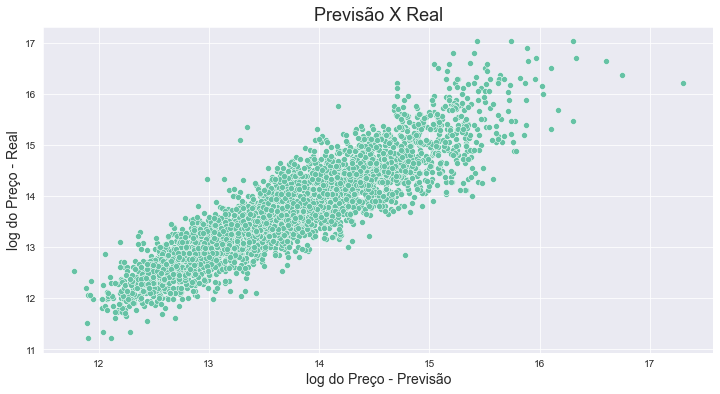

In [128]:
ax = sns.scatterplot(x=y_previsto, y=y2_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

## Obtendo os resíduos

In [113]:
residuos = y2_train - y_previsto

## Plotando a distribuição de frequências dos resíduos

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='log do Preço', ylabel='Count'>

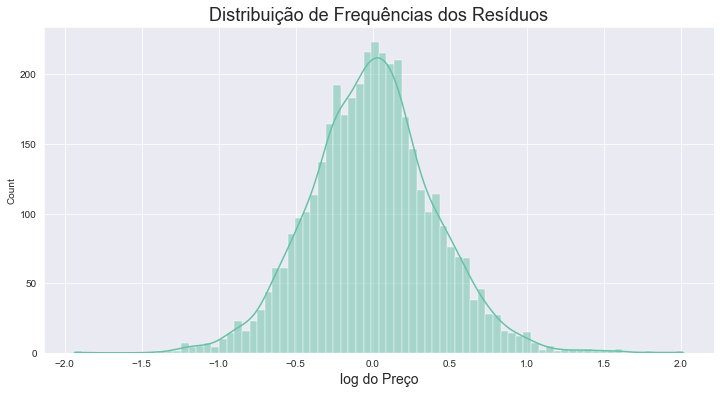

In [115]:
ax = sns.histplot(data=residuos, kde=True, bins=80)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

## Gráfico de dispersão entre valor estimado e resíduos

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)</br>
Esperado média zero</br>
Visualização da variação</br>

<AxesSubplot:title={'center':'Resíduos x Log do Valor Previsto'}, xlabel='Resíduos'>

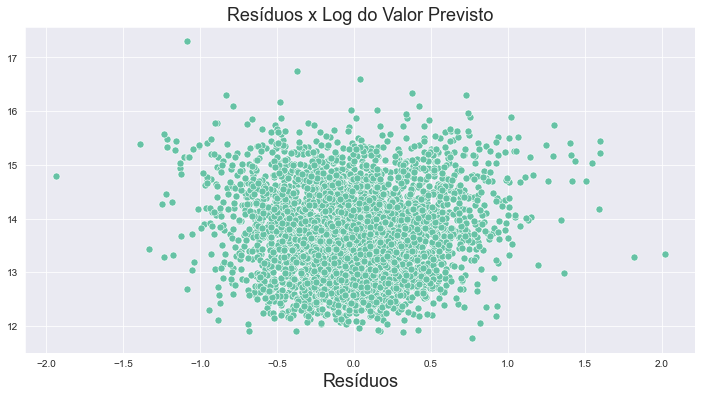

In [124]:
ax = sns.scatterplot(x=residuos, y=y_previsto, s=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos x Log do Valor Previsto', fontsize=18)
ax.set_xlabel('Resíduos', fontsize=18)
ax